In [1]:
#import libraries
import pandas as pd
import numpy as np

In [2]:
#import data
data = pd.read_csv("/content/Company_Data.csv")
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


## EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [ ]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


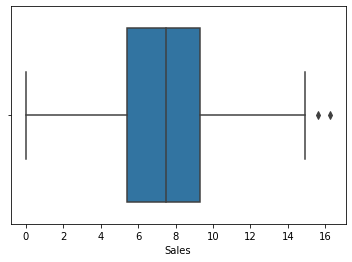

In [10]:
import seaborn as sns
sns.boxplot(data['Sales'])
# this data has 2 outlier 

In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['Urban'] = le.fit_transform(data['Urban'])
data['US'] = le.fit_transform(data['US'])
data['ShelveLoc'] = le.fit_transform(data['ShelveLoc'])
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [17]:
data.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,0.157470,-0.231815,-0.051955,-0.015419,0.177093
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0.023350,-0.100239,0.025197,0.066594,0.016869
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.067678,-0.004670,-0.056855,0.037967,0.089601
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,0.008544,-0.004557,-0.033594,0.042035,0.684460
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.044772,-0.042663,-0.106378,-0.052025,0.060564
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,0.014633,-0.102177,0.011747,0.047016,0.057861
ShelveLoc,0.157470,0.023350,-0.067678,0.008544,-0.044772,0.014633,1.000000,0.056488,0.001492,-0.063978,-0.039760
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,0.056488,1.000000,0.006488,0.028479,0.008652
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.001492,0.006488,1.000000,-0.033094,-0.078250
Urban,-0.015419,0.066594,0.037967,0.042035,-0.052025,0.047016,-0.063978,0.028479,-0.033094,1.000000,0.047085


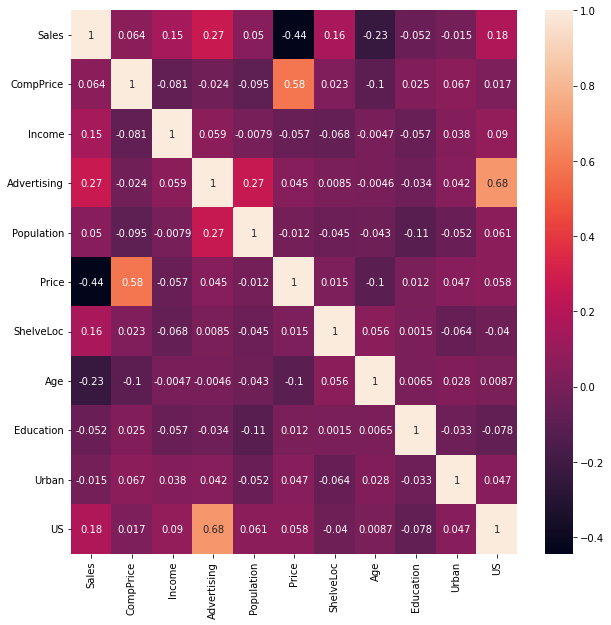

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot= True)

## Model Building

In [ ]:
#Since the target variable is continious, we create a groups based on mean
# "Small" <=7.49
# 7.49 => "large"

In [25]:
data["sales"] = "small"
data.loc[data["Sales"]>7.49,"sales"] = "large"
data.drop(["Sales"],axis=1, inplace = True)

In [26]:
data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,0,42,17,1,1,large
1,111,48,16,260,83,1,65,10,1,1,large
2,113,35,10,269,80,2,59,12,1,1,large
3,117,100,4,466,97,2,55,14,1,1,small
4,141,64,3,340,128,0,38,13,1,0,small
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,large
396,139,23,3,37,120,2,55,11,0,1,small
397,162,26,12,368,159,2,40,18,1,1,small
398,100,79,7,284,95,0,50,12,1,1,small


In [40]:
#Dividing the data into independent and dependent variable
X = data.iloc[:,0:10]
y = data.iloc[:,10]

In [41]:
#Splitting the dataset into train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test ,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)

In [42]:
y_train.value_counts()

large    164
small    156
Name: sales, dtype: int64

### Model building by Entropy method - classification problems

In [43]:
# fitting Entropy method DT
from sklearn.tree import DecisionTreeClassifier
entropy = DecisionTreeClassifier(criterion = 'entropy', max_depth =3)
entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

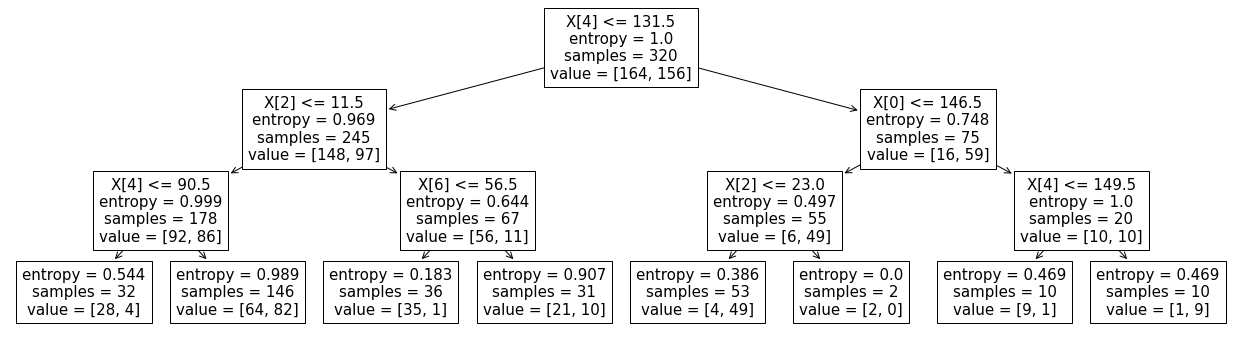

In [69]:
#plot decision tree
from sklearn import tree
plt.figure(figsize = (22,6))
tree.plot_tree(entropy);

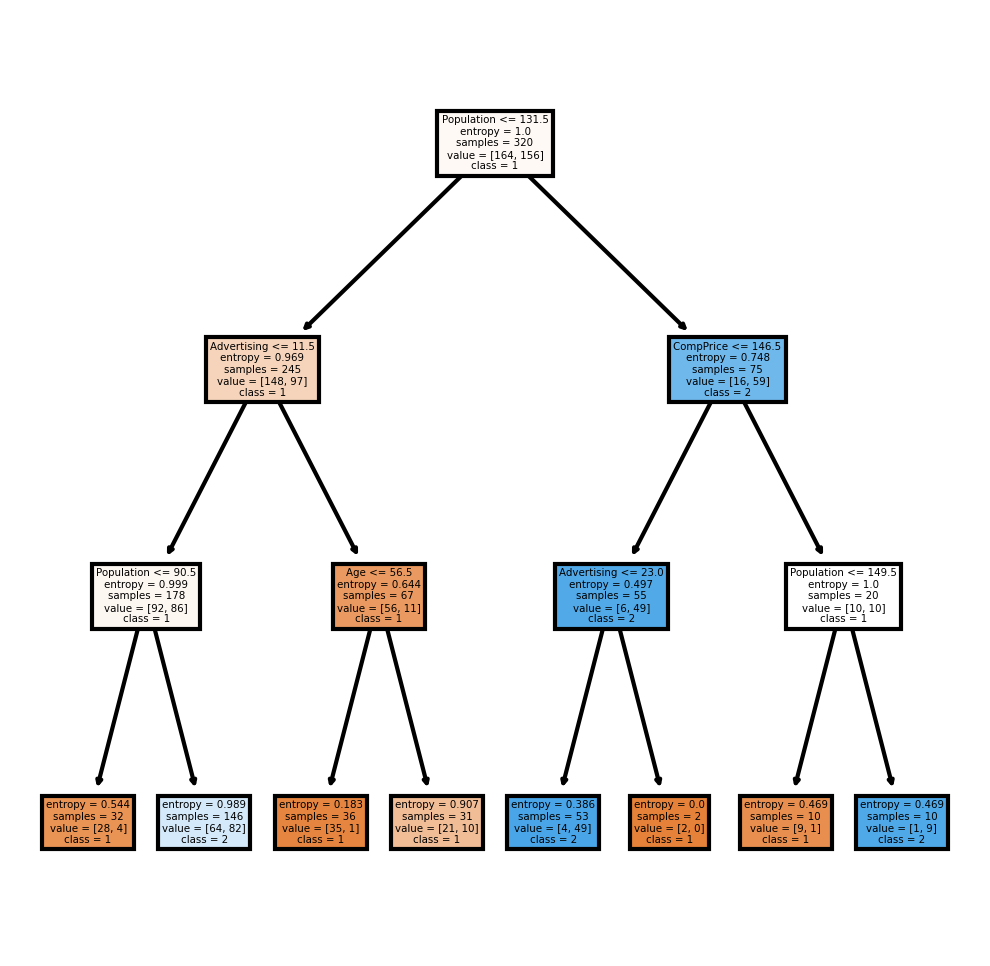

In [55]:
import matplotlib.pyplot as plt
fn = ['CompPrice','Income','Advertising','ShelveLoc',
      'Population','Price','Age','Education','Urban','US']
cn=['1', '2']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(entropy,
               feature_names = fn,
               class_names = cn,
               filled = True);

In [48]:
#Model prediction
y_pred = entropy.predict(X_test)
y_pred

array(['small', 'small', 'small', 'small', 'small', 'large', 'large',
       'large', 'small', 'large', 'small', 'small', 'small', 'large',
       'small', 'small', 'large', 'small', 'small', 'small', 'large',
       'small', 'small', 'large', 'small', 'small', 'small', 'small',
       'large', 'small', 'large', 'small', 'large', 'large', 'small',
       'large', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'large', 'small', 'small', 'small',
       'small', 'small', 'small', 'large', 'small', 'small', 'large',
       'large', 'small', 'large', 'small', 'small', 'small', 'large',
       'small', 'small', 'small', 'small', 'small', 'small', 'large',
       'large', 'large', 'small', 'small', 'large', 'small', 'small',
       'small', 'small', 'large'], dtype=object)

In [50]:
y_test.values

array(['large', 'small', 'large', 'small', 'small', 'small', 'large',
       'large', 'large', 'large', 'small', 'small', 'large', 'small',
       'large', 'small', 'small', 'large', 'small', 'small', 'large',
       'large', 'large', 'large', 'small', 'small', 'large', 'small',
       'large', 'large', 'large', 'small', 'large', 'small', 'small',
       'large', 'large', 'small', 'small', 'small', 'small', 'small',
       'small', 'large', 'small', 'small', 'large', 'small', 'small',
       'small', 'small', 'large', 'large', 'large', 'small', 'large',
       'large', 'small', 'small', 'small', 'small', 'small', 'large',
       'small', 'small', 'large', 'small', 'small', 'small', 'large',
       'large', 'large', 'small', 'large', 'large', 'large', 'small',
       'small', 'small', 'small'], dtype=object)

In [51]:
#Model accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)
print(cm)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_pred, y_test)
print("Accuracy score :", acc*100)

[[17  7]
 [18 38]]
Accuracy score : 68.75


### Model building by GINI method - Regression problems

In [52]:
# fitting GINI method DT
from sklearn.tree import DecisionTreeClassifier
gini = DecisionTreeClassifier(criterion = 'gini', max_depth =3)
gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

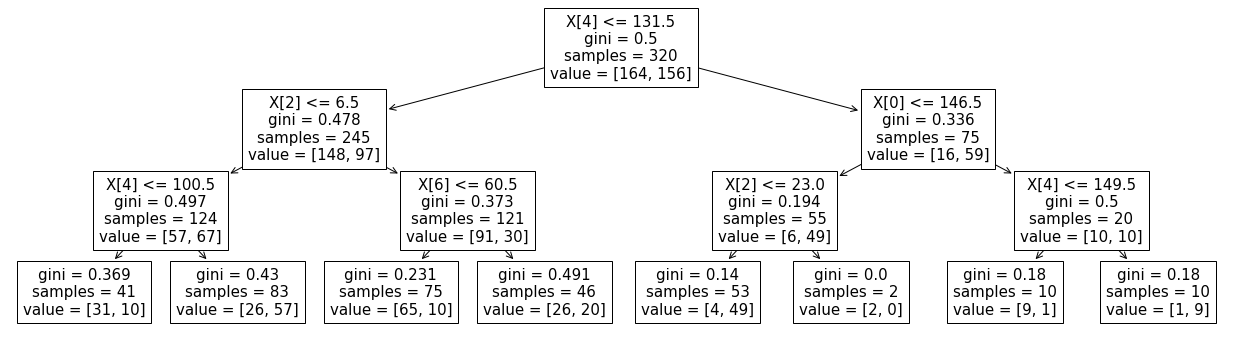

In [68]:
#plot decision tree
from sklearn import tree
plt.figure(figsize = (22,6))
tree.plot_tree(gini);

In [53]:
#Model prediction
y_pred = gini.predict(X_test)
y_pred

array(['small', 'large', 'small', 'large', 'small', 'large', 'large',
       'large', 'small', 'large', 'small', 'small', 'large', 'large',
       'large', 'large', 'large', 'large', 'small', 'small', 'large',
       'large', 'small', 'large', 'small', 'small', 'large', 'small',
       'large', 'large', 'large', 'small', 'large', 'large', 'small',
       'large', 'small', 'small', 'large', 'small', 'small', 'small',
       'small', 'large', 'large', 'large', 'large', 'small', 'small',
       'small', 'small', 'small', 'large', 'large', 'small', 'large',
       'large', 'large', 'large', 'small', 'small', 'large', 'large',
       'small', 'small', 'small', 'small', 'small', 'small', 'large',
       'large', 'large', 'large', 'small', 'large', 'large', 'small',
       'small', 'small', 'large'], dtype=object)

In [56]:
#Model accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)
print(cm)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_pred, y_test)
print("Accuracy=", acc*100)

[[27 15]
 [ 8 30]]
Accuracy= 71.25


In [61]:
impor = pd.DataFrame({'feature': list(X_train.columns), 'importance': gini.feature_importances_}).sort_values('importance', ascending = False)
impor

,feature,importance
4,Price,0.596928
2,Advertising,0.236815
6,Age,0.089146
0,CompPrice,0.077112
1,Income,0.000000
3,Population,0.000000
5,ShelveLoc,0.000000
7,Education,0.000000
8,Urban,0.000000
9,US,0.000000


From the above table Price is the most important attribute that cause high sales


